In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(42)

# data generated by myself

n = 50
age = np.random.randint(18, 60, size=n)
income = np.random.randint(20000, 120000, size=n)
probability = 1 / (1 + np.exp(-(0.00005*income + 0.08*age - 6)))


insurance_buyer = np.where(probability > 0.5, 1, 0)


df = pd.DataFrame({
    'Age': age,
    'Annual_Income': income,
    'Insurance_Buyer': insurance_buyer
})

print(df.head(10))
print("\nShape of dataset:", df.shape)


   Age  Annual_Income  Insurance_Buyer
0   56          55920                1
1   46         112067                1
2   32          87121                1
3   25          89479                1
4   38         109475                1
5   56          39457                1
6   36          86557                1
7   40          97189                1
8   28          98953                1
9   28          72995                0

Shape of dataset: (50, 3)


In [3]:
print(df['Age'].shape)
print(df['Insurance_Buyer'].shape)

(50,)
(50,)


In [4]:
df.columns

Index(['Age', 'Annual_Income', 'Insurance_Buyer'], dtype='object')

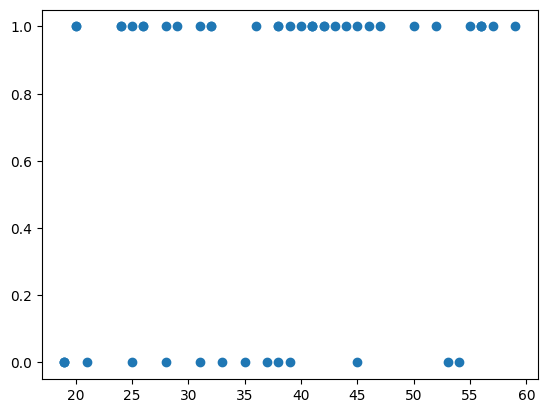

In [5]:
plt.scatter(df['Age'],df['Insurance_Buyer'])
plt.show()

In [ ]:
x = df[['Age','Annual_Income']]
y  = df['Insurance_Buyer']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
import joblib

In [80]:
def logistic_model(
    x_data,
    y_data,
    max_iter,
    penalty_="l2",
    solver_="saga"
):
    
    x_train,x_test,y_train,y_test = train_test_split(
        x_data,y_data,test_size=0.2,random_state=42
    )
    
    model = LogisticRegression(
        max_iter = max_iter,
        penalty=penalty_,
        solver = solver_
    )
    
    
    model.fit(x_train,y_train)
    
    ts =  model.score(x_train,y_train)
    
    tes = model.score(x_test,y_test)
    
    joblib.dump(model,f"C:\\Users\\hp\\PyCharmMiscProject\\git\\Insurance-Buyer-Prediction-Using-Age-Income\\Model\\{penalty_}{solver_}.pkl")
    
    return {
        "Train_Score":ts,
        "Test_Score":tes,
        "Model": model
    }
    

In [81]:
result = logistic_model(
    x,
    y,
    100,
    "l2",
    "newton-cg"
)

print("Train Score:",result["Train_Score"])
print("Test Score:",result["Test_Score"])
model_ = result["Model"]


Train Score: 1.0
Test Score: 1.0


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [30]:
l1_n_model = logistic_model(x,y,"l1","liblinear")
print("train score is:",l1_n_model[0])
print("test score is:",l1_n_model[1])

train score is: 0.875
test score is: 1.0


In [82]:
y_pred = model_.predict(x)

In [83]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0])

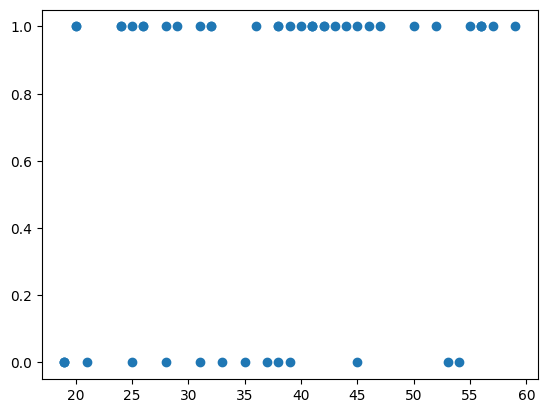

In [86]:
plt.scatter(x['Age'],y_pred)
plt.show()

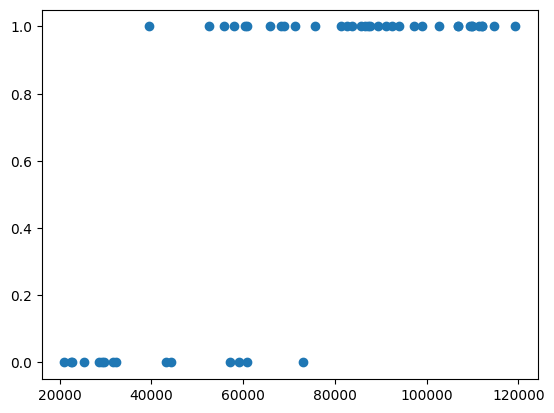

In [87]:
plt.scatter(x['Annual_Income'],y_pred)
plt.show()